# Data Mining Project 2020-2021

# Introduction 


## 1.1 Importing libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from math import ceil

## 1.2 Importing and Assessing Data

In [94]:
df = pd.DataFrame(pd.read_csv('donors.csv'))

In [95]:
df.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,...,7.741935,95515,0,L,4,E,X,X,X,C
1,1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2,2010-01-01,AMH,1,NC,27017,,,NaN,0,...,7.481481,15078,1,L,4,E,X,X,X,C
3,3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,...,6.812500,172556,1,L,4,E,X,X,X,C
4,4,2006-01-01,,0,FL,33176,,,1940-01-01,0,...,6.864865,7112,1,L,2,F,X,X,X,A


In [96]:
#Dimension of the Dataset
df.shape

(95412, 476)

In [97]:
#Data types of the variables
df.dtypes

Unnamed: 0     int64
ODATEDW       object
OSOURCE       object
TCODE          int64
STATE         object
               ...  
RFA_2A        object
MDMAUD_R      object
MDMAUD_F      object
MDMAUD_A      object
GEOCODE2      object
Length: 476, dtype: object

## Distribution of Features

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}' by DV Category'".format(var_name = x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

# First group of columns (Donor's Characteristics)

In [99]:
DonorCharactdf = df[['CONTROLN','TCODE','DOB','GENDER','NUMCHLD','INCOME','STATE','ZIP','MDMAUD']]
DonorCharactdf.set_index('CONTROLN', inplace=True)
DonorCharactdf

,TCODE,DOB,GENDER,NUMCHLD,INCOME,STATE,ZIP,MDMAUD
CONTROLN,,,,,,,,
95515,0,1957-12-01,F,NaN,NaN,IL,61081,XXXX
148535,1,1972-02-01,M,1.0,6.0,CA,91326,XXXX
15078,1,NaN,M,NaN,3.0,NC,27017,XXXX
172556,0,1948-01-01,F,NaN,1.0,CA,95953,XXXX
7112,0,1940-01-01,F,1.0,3.0,FL,33176,XXXX
...,...,...,...,...,...,...,...,...
184568,1,NaN,M,NaN,NaN,AK,99504,XXXX
122706,1,1970-01-01,M,1.0,7.0,TX,77379,XXXX
189641,1,1958-01-01,M,NaN,NaN,MI,48910,XXXX


In [100]:
DonorCharactdf.TCODE = DonorCharactdf.TCODE.astype('category')
DonorCharactdf.GENDER = DonorCharactdf.GENDER.astype('category')
DonorCharactdf.STATE = DonorCharactdf.STATE.astype('category')
DonorCharactdf.MDMAUD = DonorCharactdf.MDMAUD.astype('category')
DonorCharactdf.INCOME = DonorCharactdf.INCOME.astype('category')

In [101]:
DonorCharactdf.dtypes

TCODE      category
DOB          object
GENDER     category
NUMCHLD     float64
INCOME     category
STATE      category
ZIP          object
MDMAUD     category
dtype: object

In [102]:
#check null values
DonorCharactdf.isnull().sum()

TCODE          0
DOB        23883
GENDER         0
NUMCHLD    83026
INCOME     21286
STATE          0
ZIP            0
MDMAUD         0
dtype: int64

In [103]:
DonorCharactdf.iloc[:,1:].describe(include='all')

,DOB,GENDER,NUMCHLD,INCOME,STATE,ZIP,MDMAUD
count,71529,95412,12386.000000,74126.0,95412,95412,95412
unique,847,7,NaN,7.0,57,19938,28
top,1968-01-01,F,NaN,5.0,CA,85351,XXXX
freq,1479,51277,NaN,15451.0,17343,61,95118
mean,NaN,NaN,1.527773,NaN,NaN,NaN,NaN
std,NaN,NaN,0.806861,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [104]:
#More info about df
DonorCharactdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   TCODE    95412 non-null  category
 1   DOB      71529 non-null  object  
 2   GENDER   95412 non-null  category
 3   NUMCHLD  12386 non-null  float64 
 4   INCOME   74126 non-null  category
 5   STATE    95412 non-null  category
 6   ZIP      95412 non-null  object  
 7   MDMAUD   95412 non-null  category
dtypes: category(5), float64(1), object(2)
memory usage: 3.4+ MB


## Getting the Age of every donor

In [105]:
#converting the DOB column to datetime type
parsed_dates = pd.to_datetime(DonorCharactdf.DOB, format='%Y-%m-%d' , errors='coerce') #errors='coerce' meant to return NaN in case of exception
DonorCharactdf['DOB'] = parsed_dates

In [106]:
#Getting the age of every donor today
DonorCharactdf['Age'] = ((pd.datetime.today() - DonorCharactdf['DOB']).dt.days/365).floordiv(other=1).astype('int',errors='ignore')

<AxesSubplot:>

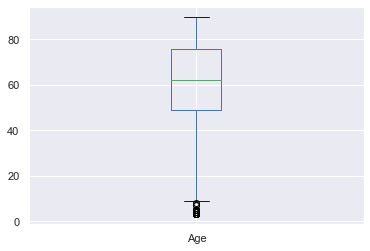

In [107]:
DonorCharactdf['Age'].plot.box()
#here we can see that we have outliers 

In [108]:
#drop de DOB column
DonorCharactdf.drop('DOB',inplace=True,axis = 1)

### Removing Age outliers

In [109]:
# Compute the IQR
# CODE HERE
q1= DonorCharactdf.quantile(0.25).Age
q3= DonorCharactdf.quantile(0.75).Age
Iqr = q3 - q1

# Compute upper and lower limit (lower_limit = Q1 -1.5*IQR | upper_limit = Q3 + 1.5*IQR)
lower_lim = q1 - 1.5*Iqr
upper_lim = q3 + 1.5*Iqr

initial_len = DonorCharactdf.shape[0]

DonorCharactdf = DonorCharactdf[~(DonorCharactdf['Age'] < lower_lim) | (DonorCharactdf['Age'] > upper_lim)]

len_afterremov = DonorCharactdf.shape[0]

print('Percentage of data kept after removing outliers:', np.round(len_afterremov / initial_len, 4))

Percentage of data kept after removing outliers: 0.9998


## NUMCHILD

In [110]:
print(DonorCharactdf.isnull().sum())
#too many null values for Number of Childrens so we will drop that column
DonorCharactdf.drop('NUMCHLD',inplace=True,axis = 1)

TCODE          0
GENDER         0
NUMCHLD    83006
INCOME     21283
STATE          0
ZIP            0
MDMAUD         0
Age        23883
dtype: int64


## GENDER

In [111]:
#checking all the values for the Gender
#M = Male
#F = Female
#U = Unknown
#J = Joint Account
print(DonorCharactdf['GENDER'].unique())

#replacing unknown values to 'U'
DonorCharactdf['GENDER'].replace(' ','U',inplace=True)
DonorCharactdf['GENDER'].replace('A','U',inplace=True)
DonorCharactdf['GENDER'].replace('C','U',inplace=True)

#checking the difference
print(DonorCharactdf['GENDER'].unique())

['F', 'M', ' ', 'C', 'U', 'J', 'A']
Categories (7, object): ['F', 'M', ' ', 'C', 'U', 'J', 'A']
['F', 'M', 'U', 'J']
Categories (4, object): ['F', 'M', 'U', 'J']


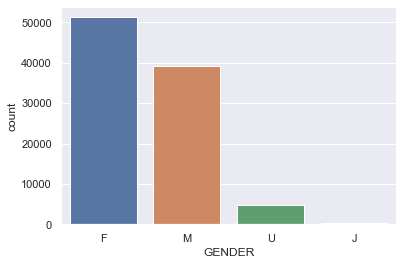

In [112]:
sns.countplot(x=DonorCharactdf['GENDER'],order = DonorCharactdf['GENDER'].value_counts().index)
plt.show()

## INCOME

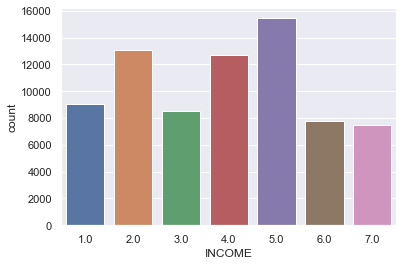

In [113]:
#get a distribution of the income
sns.countplot(x = DonorCharactdf['INCOME'])
plt.show()

## STATE

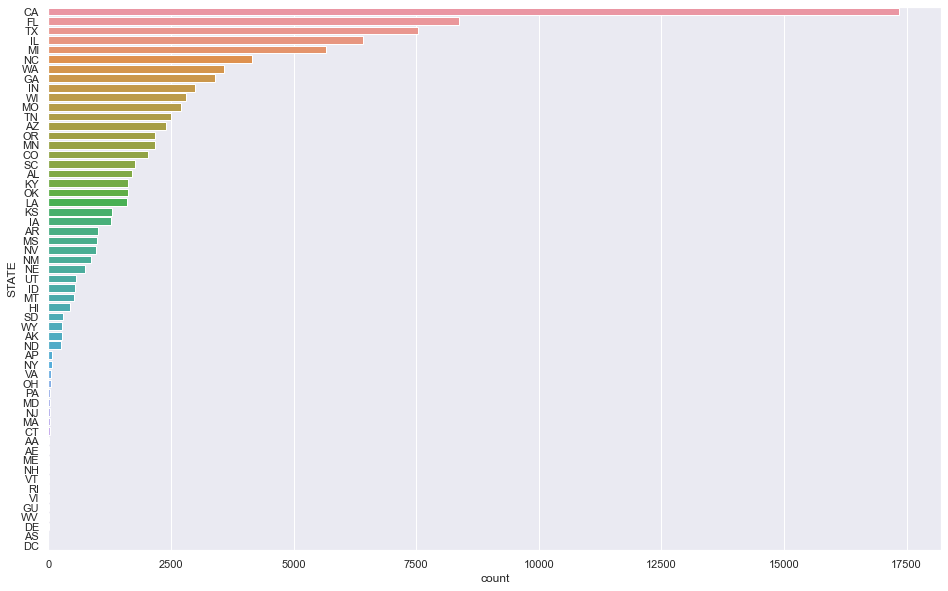

In [114]:
plt.figure(figsize=(16,10))
sns.countplot(y = DonorCharactdf.STATE , order = DonorCharactdf.STATE.value_counts().index)
plt.show()

## MDMAUD - Major Donor Matrix

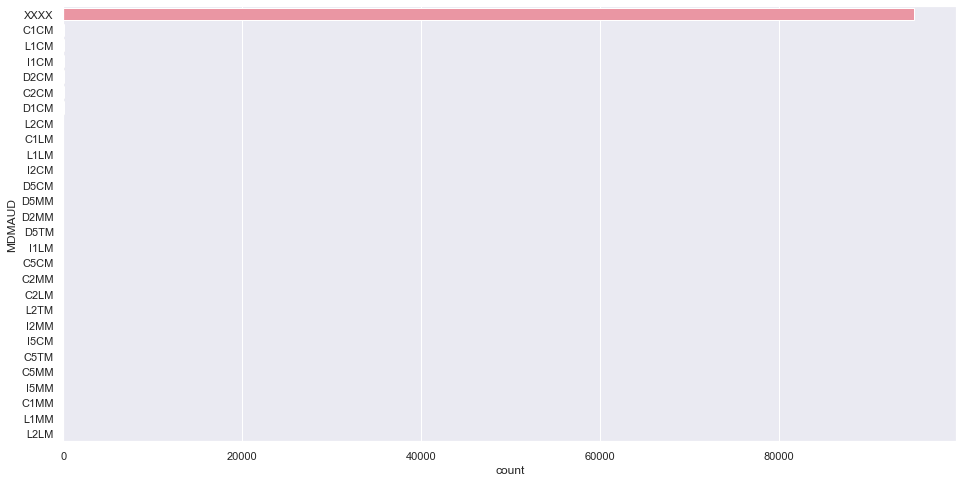

In [115]:
plt.figure(figsize=(16,8))
sns.countplot(y = DonorCharactdf.MDMAUD , order = DonorCharactdf.MDMAUD.value_counts().index)
plt.show()

# Donor's Interests

In [116]:
#Dataframe containing every donor's interests
InterestsDf = df.loc[:, 'COLLECT1':'PLATES']
#Replace the values for booleans
InterestsDf = InterestsDf.replace(' ',0)
InterestsDf = InterestsDf.replace('Y',1)
InterestsDf  = InterestsDf.astype(bool)
InterestsDf

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,True,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
95410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


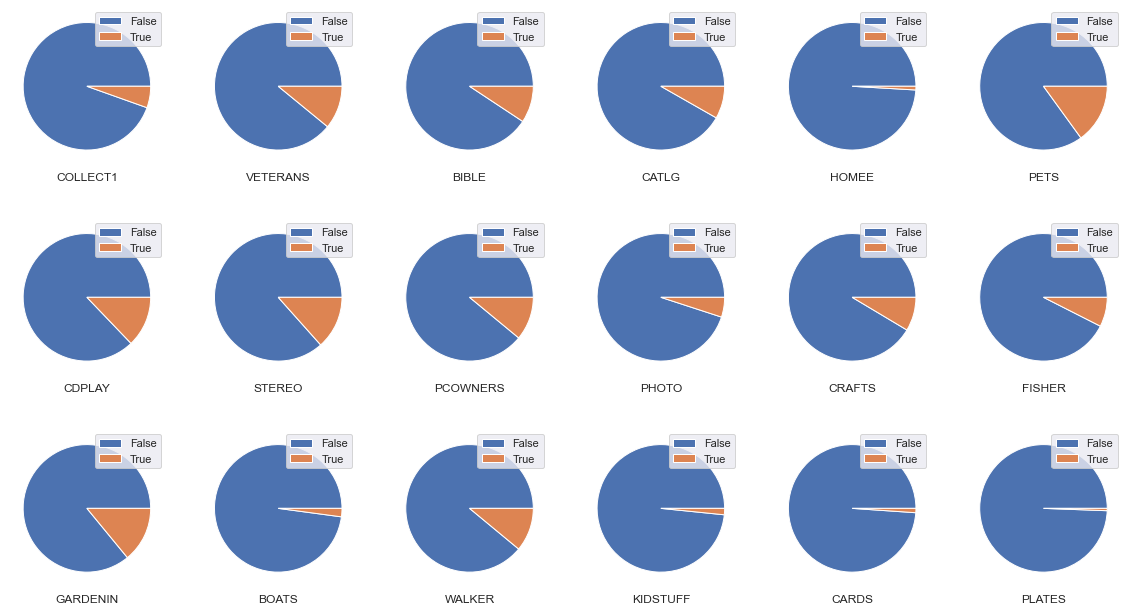

In [117]:
plotdf = InterestsDf.apply(pd.value_counts)

#plot pie charts for all the interests

sns.set()

fig, axes = plt.subplots(3, ceil(len(plotdf.columns.to_list()) / 3), figsize=(20,11))

for ax, feat in zip(axes.flatten(), plotdf.columns.to_list()):
    ax.pie(plotdf[feat])
    ax.set_title(feat, y=-0.13)
    ax.legend(plotdf.index)

plt.show() 

# Donor's Gifts

In [118]:
GiftsDf = df.loc[:, ['ODATEDW','RAMNTALL','NGIFTALL','CARDGIFT','LASTGIFT','LASTDATE','FISTDATE','AVGGIFT']]

In [119]:
GiftsDf

,ODATEDW,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,AVGGIFT
0,2009-01-01,240.0,31,14,10.0,2015-12-01,2009-11-01,7.741935
1,2014-01-01,47.0,3,1,25.0,2015-12-01,2013-10-01,15.666667
2,2010-01-01,202.0,27,14,5.0,2015-12-01,2010-01-01,7.481481
3,2007-01-01,109.0,16,7,10.0,2015-12-01,2007-02-01,6.812500
4,2006-01-01,254.0,37,8,15.0,2016-01-01,1999-03-01,6.864865
...,...,...,...,...,...,...,...,...
95407,2016-01-01,25.0,1,0,25.0,2016-02-01,2016-02-01,25.000000
95408,2016-01-01,20.0,1,0,20.0,2016-03-01,2016-03-01,20.000000
95409,2015-01-01,58.0,7,4,10.0,2016-10-01,2014-10-01,8.285714
95410,2006-01-01,498.0,41,18,18.0,2017-01-01,2006-12-01,12.146341


In [120]:
GiftsDf.isnull().sum()

ODATEDW     0
RAMNTALL    0
NGIFTALL    0
CARDGIFT    0
LASTGIFT    0
LASTDATE    0
FISTDATE    2
AVGGIFT     0
dtype: int64

In [121]:
GiftsDf.ODATEDW = pd.to_datetime(GiftsDf.ODATEDW, format='%Y-%m-%d' , errors='coerce')
GiftsDf.LASTDATE = pd.to_datetime(GiftsDf.LASTDATE, format='%Y-%m-%d' , errors='coerce')
GiftsDf.FISTDATE = pd.to_datetime(GiftsDf.FISTDATE, format='%Y-%m-%d' , errors='coerce')

In [122]:
GiftsDf.dtypes

ODATEDW     datetime64[ns]
RAMNTALL           float64
NGIFTALL             int64
CARDGIFT             int64
LASTGIFT           float64
LASTDATE    datetime64[ns]
FISTDATE    datetime64[ns]
AVGGIFT            float64
dtype: object

In [124]:
metric_GiftsDf = GiftsDf.loc[:,(np.array(GiftsDf.dtypes=="int64")) | (np.array(GiftsDf.dtypes=="float64"))]
metric_GiftsDf

,RAMNTALL,NGIFTALL,CARDGIFT,LASTGIFT,AVGGIFT
0,240.0,31,14,10.0,7.741935
1,47.0,3,1,25.0,15.666667
2,202.0,27,14,5.0,7.481481
3,109.0,16,7,10.0,6.812500
4,254.0,37,8,15.0,6.864865
...,...,...,...,...,...
95407,25.0,1,0,25.0,25.000000
95408,20.0,1,0,20.0,20.000000
95409,58.0,7,4,10.0,8.285714
95410,498.0,41,18,18.0,12.146341


<AxesSubplot:>

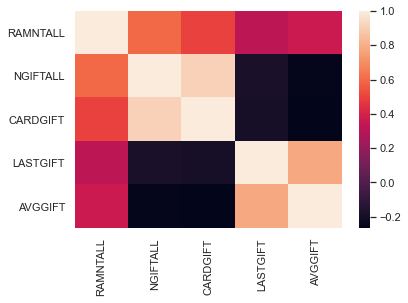

In [125]:
corr = metric_GiftsDf.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## RAMNTALL - Dollar amount of lifetime gifts to date

<AxesSubplot:ylabel='RAMNTALL'>

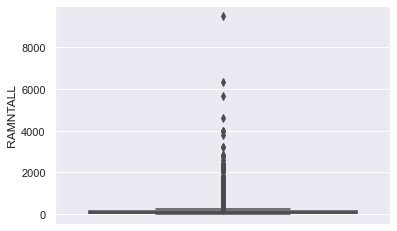

In [27]:
sns.boxplot(y =GiftsDf['RAMNTALL'])

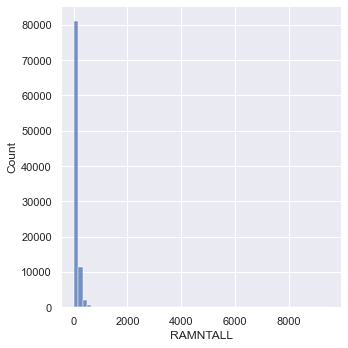

In [28]:
sns.displot(GiftsDf['RAMNTALL'],bins=60)

## AVGGIFT - Average dollar amount of gifts to date

<AxesSubplot:ylabel='AVGGIFT'>

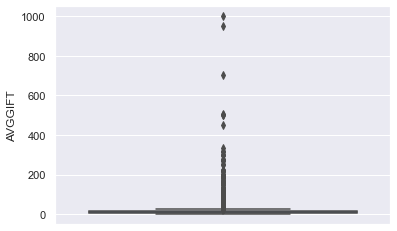

In [29]:
sns.boxplot(y =GiftsDf['AVGGIFT'])

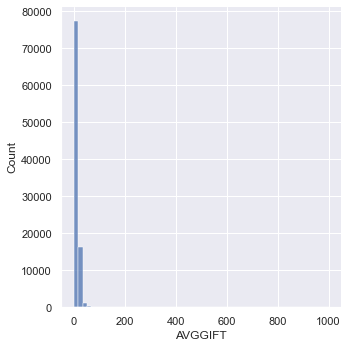

In [30]:
sns.displot(GiftsDf['AVGGIFT'],bins=60)

## NGIFTALL - Number of lifetime gifts to date

<AxesSubplot:ylabel='NGIFTALL'>

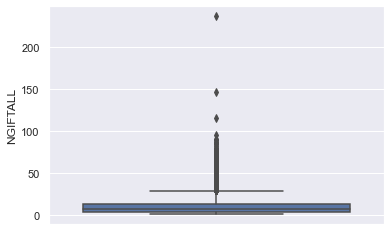

In [31]:
sns.boxplot(y =GiftsDf['NGIFTALL'])

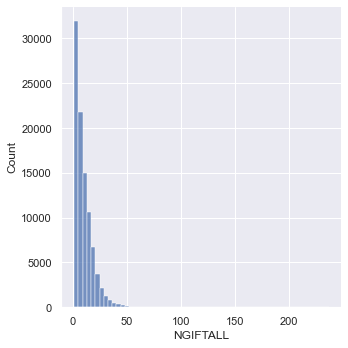

In [32]:
sns.displot(GiftsDf['NGIFTALL'],bins=60)